Importing Libraries


In [1]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

#### Question 1


In [12]:
# acquire MNIST data
fashion_mnist = keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()


a(i)


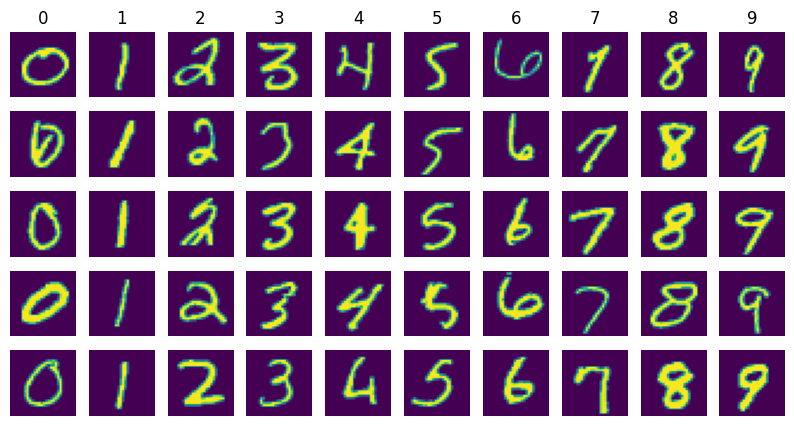

In [28]:
def plot1(X_train, Y_train, n):
    image_list = []
    for i in range(10):
        image_list_i = X_train[Y_train == i]
        image_list.append(image_list_i[np.random.choice(
            image_list_i.shape[0], n, replace=False)])

    fig, axes = plt.subplots(n, 10, figsize=(10, 5))
    for i in range(n):
        for j in range(10):
            axes[i, j].imshow(image_list[j][i])
            axes[i, j].axis('off')
            if i == 0:
                axes[i, j].set_title(j)
    plt.show()


plot1(X_train, Y_train, 5)


a (ii)


Shape of the training data:  (60000, 28, 28)
Shape of the testing data:  (10000, 28, 28)
Shape of the training labels:  (60000,)
Shape of the testing labels:  (10000,)
Number of classes:  10
Number of training samples:  60000
Number of testing samples:  10000
Shape of an image in the dataset:  (28, 28)


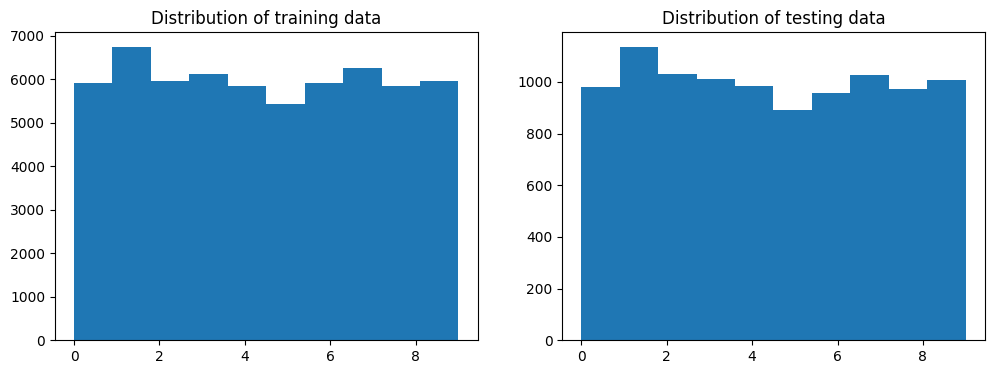

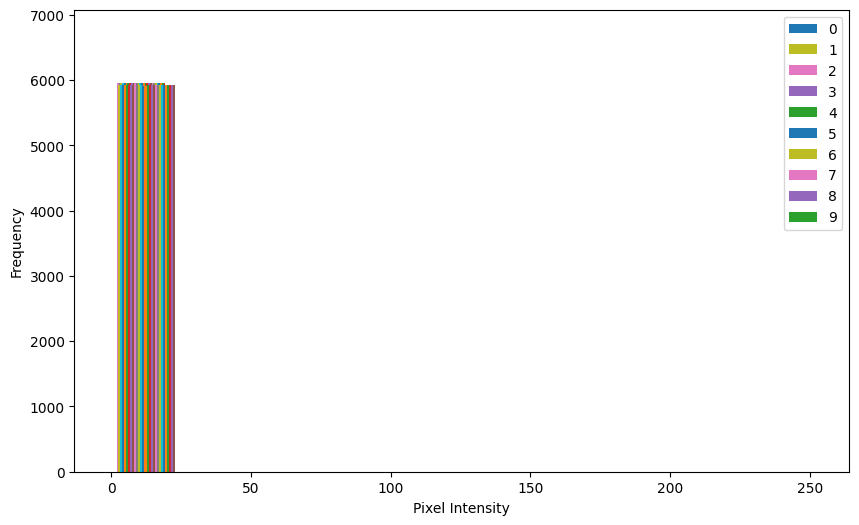

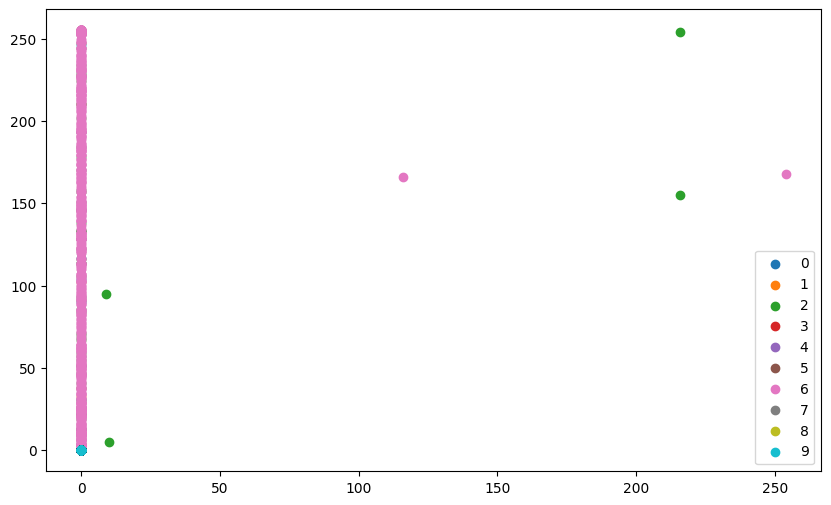

In [27]:
def EDA(X_test, X_train, Y_test, Y_train):
    print("Shape of the training data: ", X_train.shape)
    print("Shape of the testing data: ", X_test.shape)
    print("Shape of the training labels: ", Y_train.shape)
    print("Shape of the testing labels: ", Y_test.shape)
    print("Number of classes: ", len(np.unique(Y_train)))
    print("Number of training samples: ", X_train.shape[0])
    print("Number of testing samples: ", X_test.shape[0])
    print("Shape of an image in the dataset: ", X_train[0].shape)
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.hist(Y_train, bins=10)
    plt.title("Distribution of training data")
    plt.subplot(1, 2, 2)
    plt.hist(Y_test, bins=10)
    plt.title("Distribution of testing data")
    plt.show()


def scatterplot(X_train, Y_train):
    plt.figure(figsize=(10, 6))
    for i in range(10):
        plt.scatter(X_train[Y_train == i, 0],
                    X_train[Y_train == i, 1], label=i)
    plt.legend()
    plt.show()


def histplot(X_train, Y_train):
    plt.figure(figsize=(10, 6))
    for i in range(10):
        plt.hist(X_train[Y_train == i, 0], label=i)
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()


EDA(X_test, X_train, Y_test, Y_train)
histplot(X_train, Y_train)
scatterplot(X_train, Y_train)


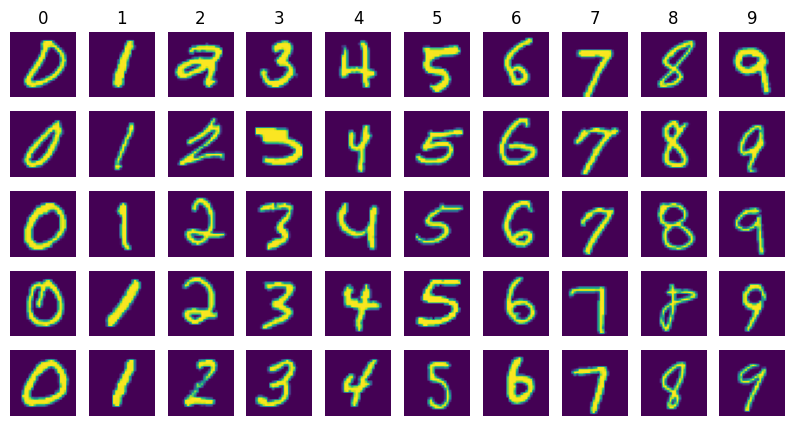

In [29]:
def normalize(X_train, X_test):
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    X_train /= 255
    X_test /= 255
    return X_train, X_test


normalize(X_train, X_test)


b (i)


In [48]:
import pandas as pd
df = pd.read_csv('AQI.csv')

df["Date"] = pd.to_datetime(df["Date"])
df["Year"] = df["Date"].dt.year
selected_data_2015 = df[df["Year"] == 2015]
selected_data_2016 = df[df["Year"] == 2016]
selected_data_2017 = df[df["Year"] == 2017]
selected_data_2018 = df[df["Year"] == 2018]

merged_data = pd.concat([selected_data_2015, selected_data_2016,
                        selected_data_2017, selected_data_2018], axis=0)


In [50]:
# Performing EDA on new Dataset
print(merged_data.shape)

# 1(a)(ii)A It is good to read about the dataset from wherever possible, but as a standard practice, a data scientist must cross-check facts. In the future, you might be given datasets with no prior knowledge, and you must have a habit of exploring the characteristics of the data.

# For 1(b)(i), as mentioned in the note for EDA, you need to adapt the points as per the data. E.g. here, image size does not make any sense. So you may look at the distribution of the various features such as PM2.5 or NOx. The second could be to check the class imbalance in the various AQI buckets. Finally, you can look at the data to understand if normalization or standardization works best and apply the same. However, these are suggestive and non-exhaustive pointers; you are free to perform a minimum of 3 EDA tasks.


(17439, 17)

##### EDA


In [53]:
# Removing Unnecessary warnings
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
# Importing Dataset
new_df = merged_data
Y_labels = merged_data["AQI_Bucket"].values
X_labels = merged_data.drop(["AQI_Bucket", "Date", "Year"], axis=1).values


In [55]:
new_df.head()


City       Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad 2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad 2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad 2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad 2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad 2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket    Year  
0  133.36     0.00     0.02    0.00  NaN        NaN  2015.0  
1   34.06     3.68     5.50    3.77  NaN        NaN  2015.0  
2   30.70     6.80    16.40    2.25  NaN        NaN  2015.0  
3   36.08     4.43    10.14    1.00  NaN        NaN  2015.0  
4   39.31     7.01    18.89    2.78  NaN        NaN  2015.0

In [56]:
print(f'The dataset has {new_df.shape[0]} rows and {new_df.shape[1]} columns.')


The dataset has 17439 rows and 17 columns.


In [62]:
new_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 17439 entries, 0 to 28982
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        17439 non-null  object        
 1   Date        17439 non-null  datetime64[ns]
 2   PM2.5       13319 non-null  float64       
 3   PM10        7961 non-null   float64       
 4   NO          14300 non-null  float64       
 5   NO2         14354 non-null  float64       
 6   NOx         14029 non-null  float64       
 7   NH3         9141 non-null   float64       
 8   CO          15905 non-null  float64       
 9   SO2         14100 non-null  float64       
 10  O3          13995 non-null  float64       
 11  Benzene     13619 non-null  float64       
 12  Toluene     13103 non-null  float64       
 13  Xylene      6803 non-null   float64       
 14  AQI         13358 non-null  float64       
 15  AQI_Bucket  13358 non-null  object        
 16  Year        17439 non-

In [63]:
new_df.nunique()
new_df['AQI_Bucket'].unique()


array([nan, 'Poor', 'Very Poor', 'Severe', 'Moderate', 'Satisfactory',
       'Good'], dtype=object)

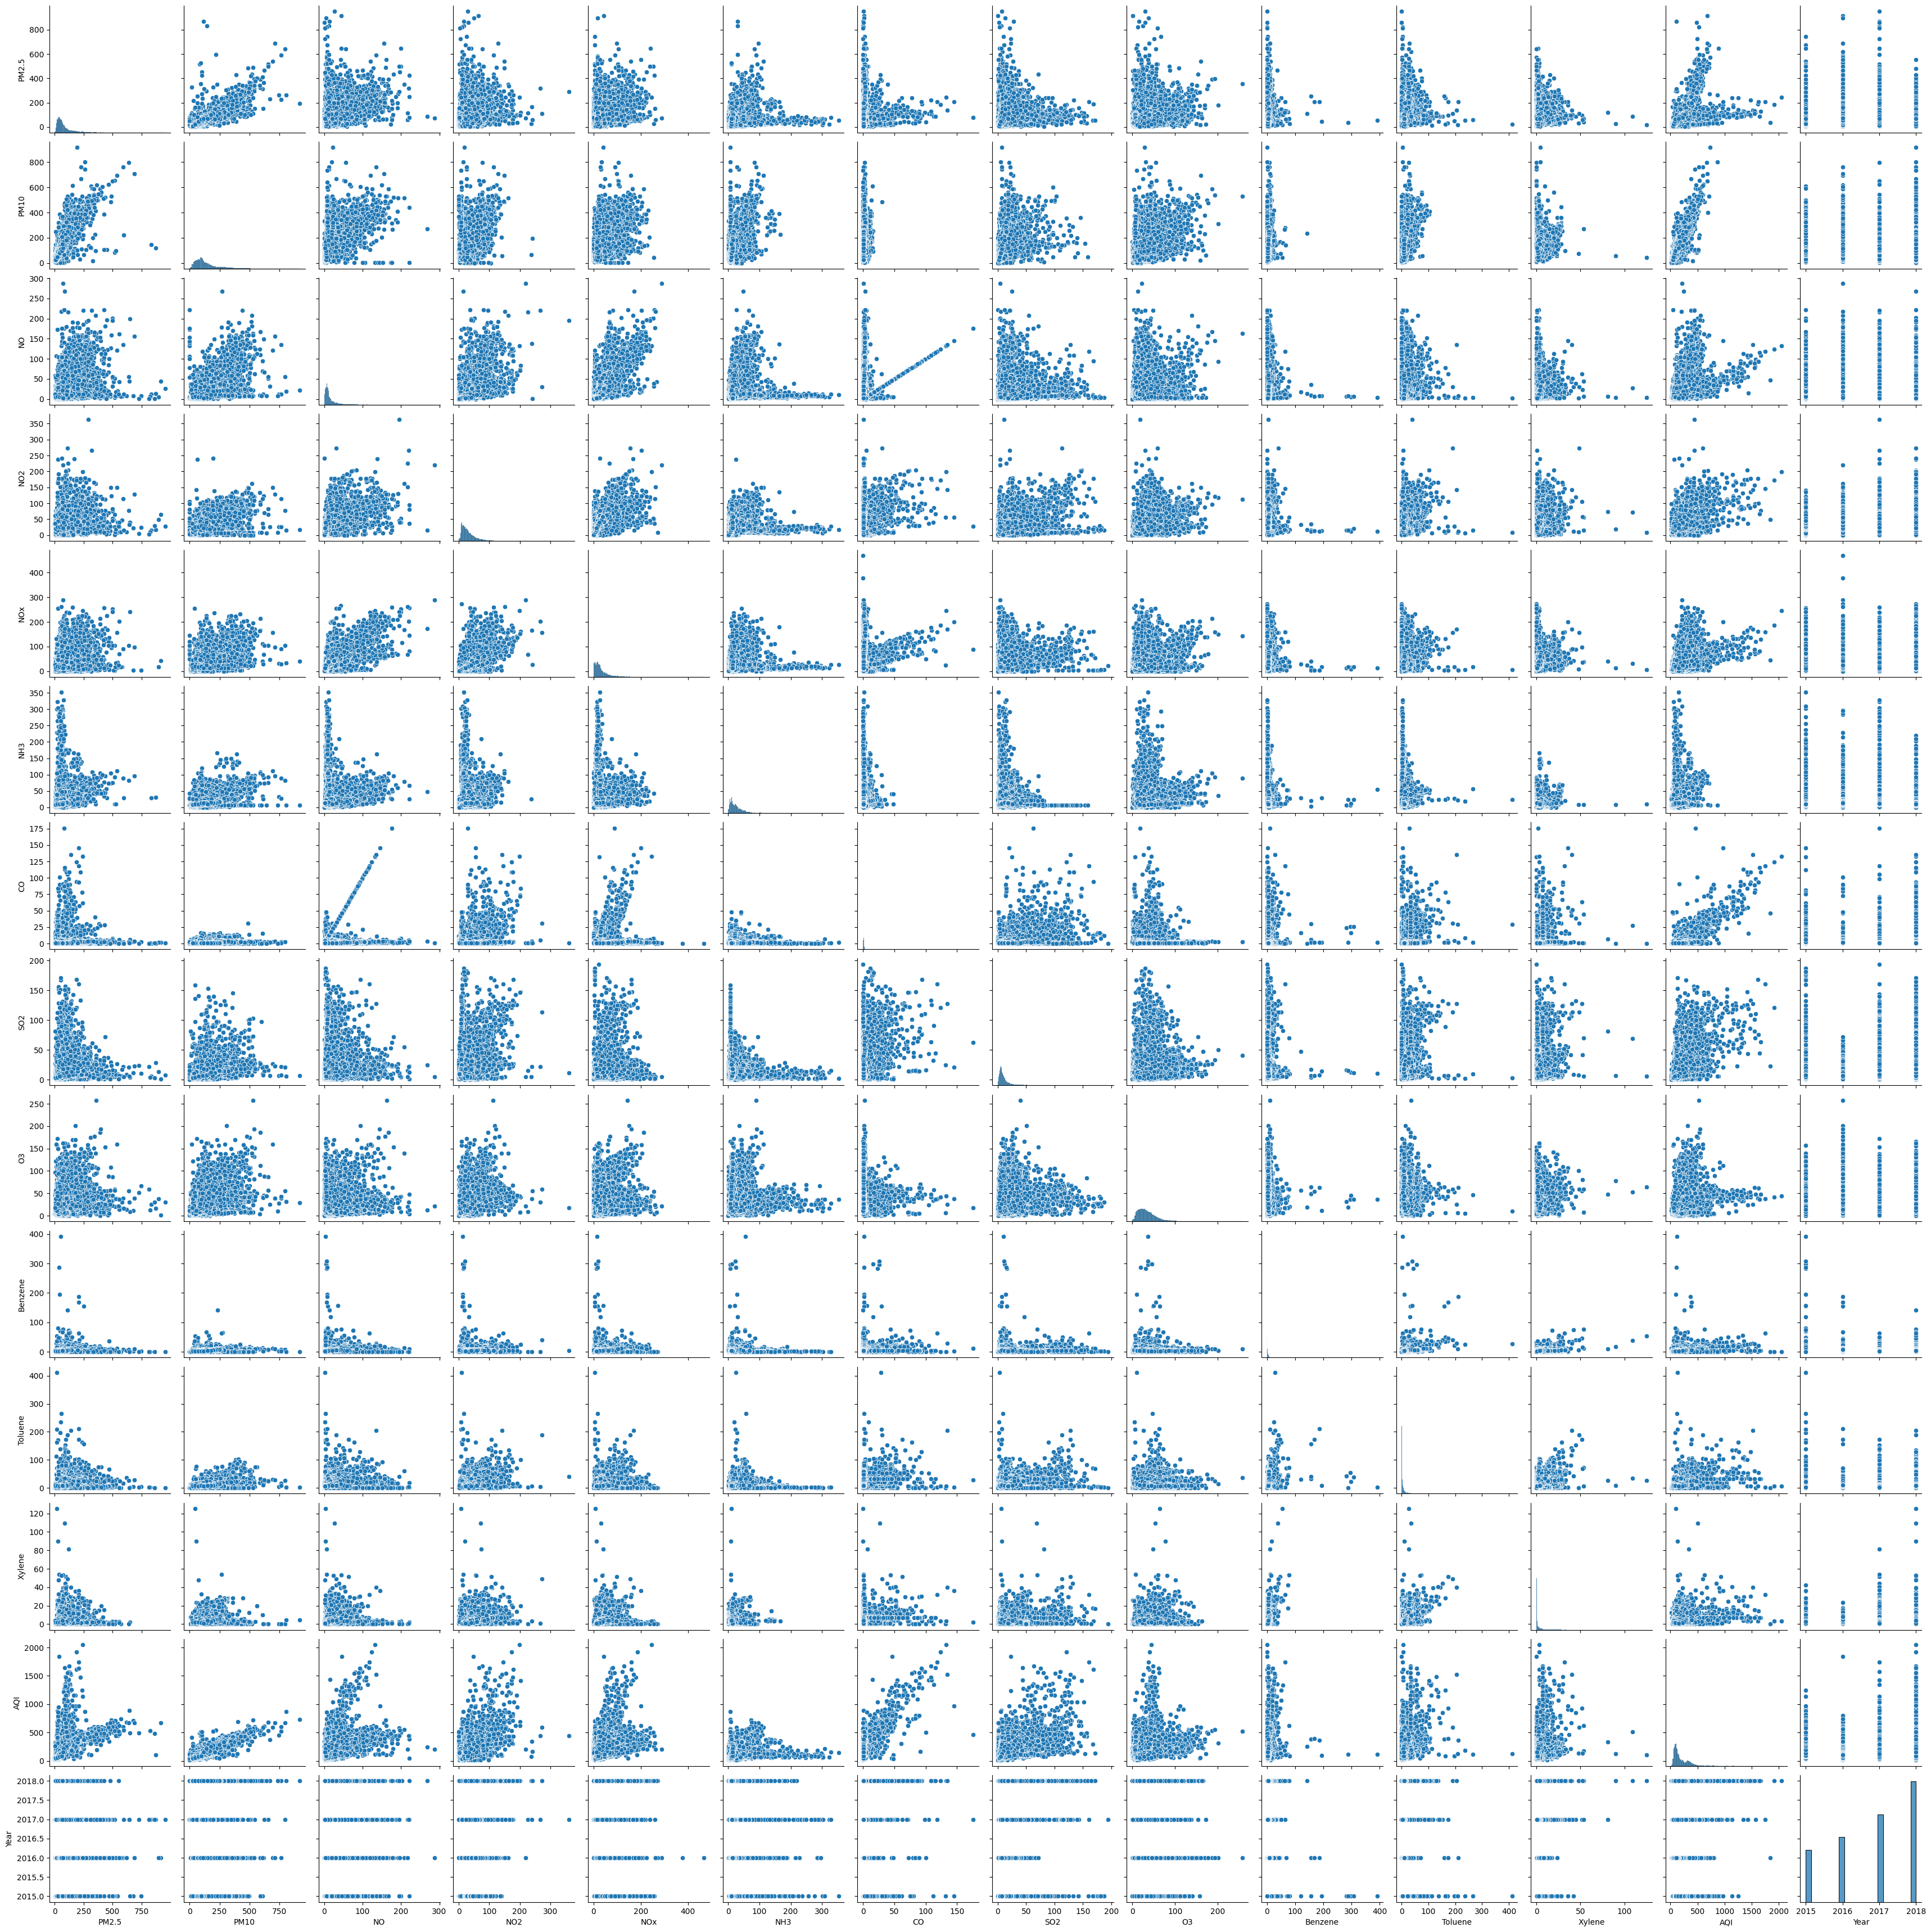

In [64]:
import seaborn as sb
sb.pairplot(new_df)

<AxesSubplot:>

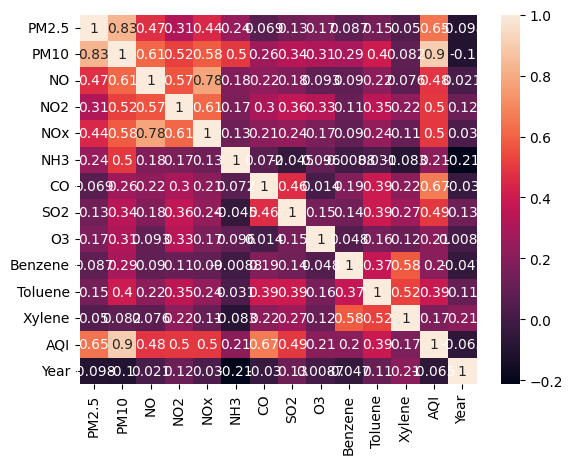

In [65]:
core = new_df.corr()
sb.heatmap(core, xticklabels=core.columns,
           yticklabels=core.columns, annot=True)  # correlation Plot


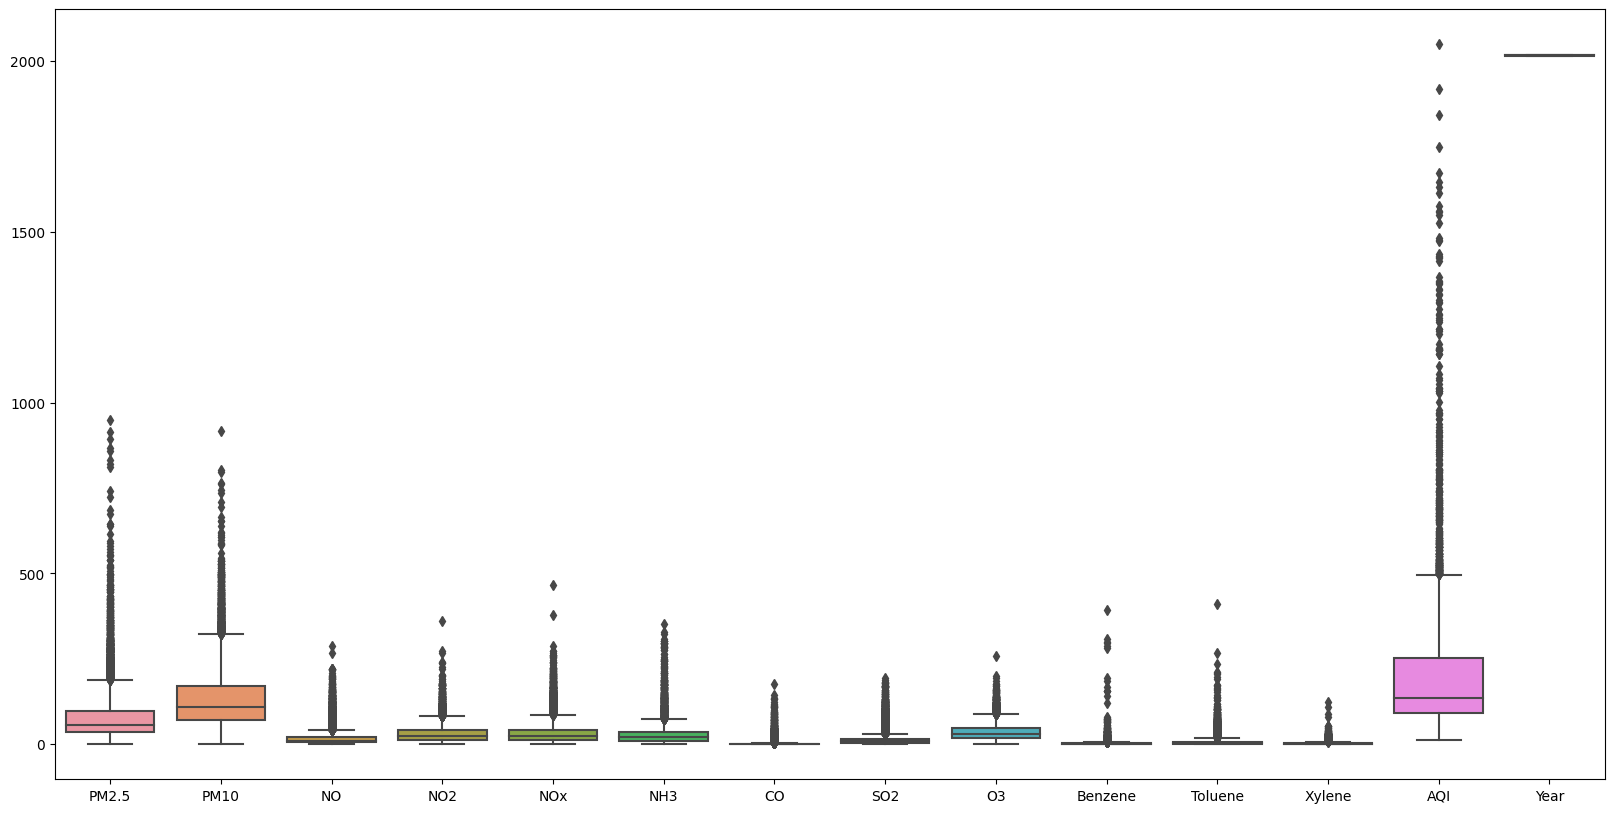

In [67]:
plt.figure(figsize=(20, 10))
sb.boxplot(data=new_df, width=0.8)
plt.show()


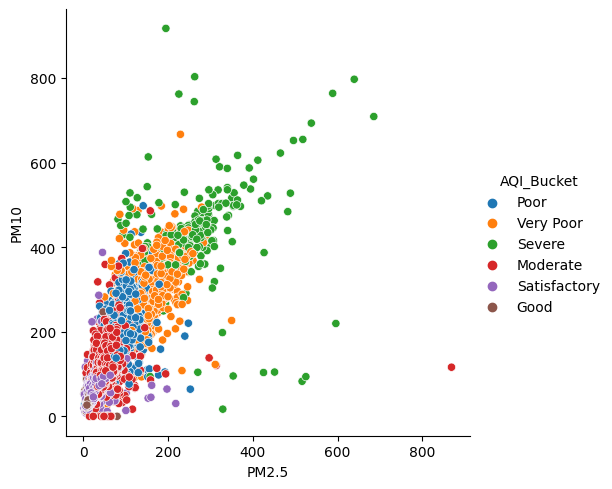

In [68]:
sb.relplot(x='PM2.5', y='PM10', hue='AQI_Bucket', data=new_df)  # scatter plot


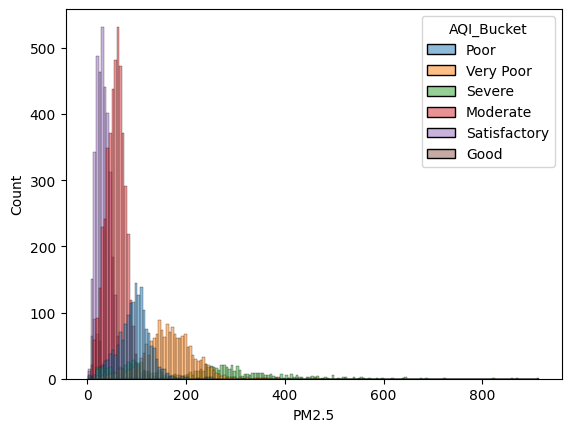

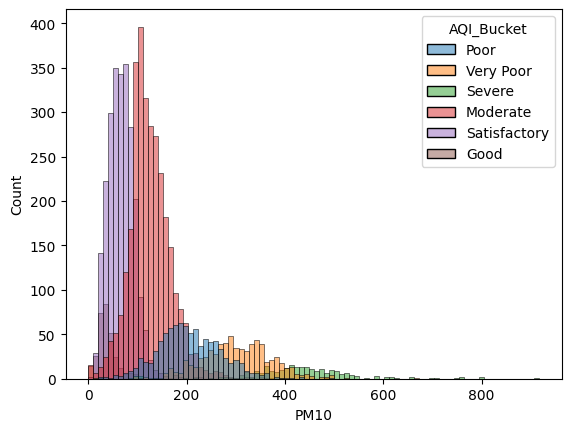

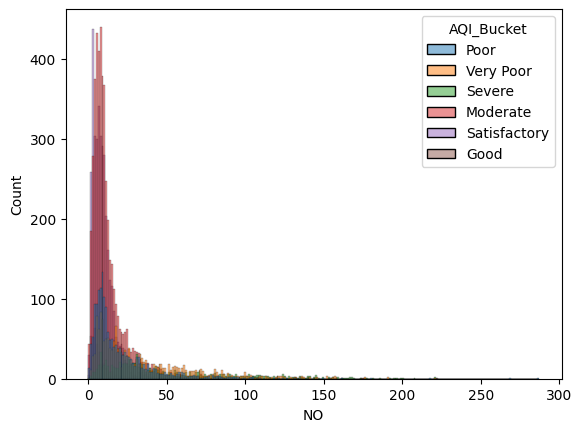

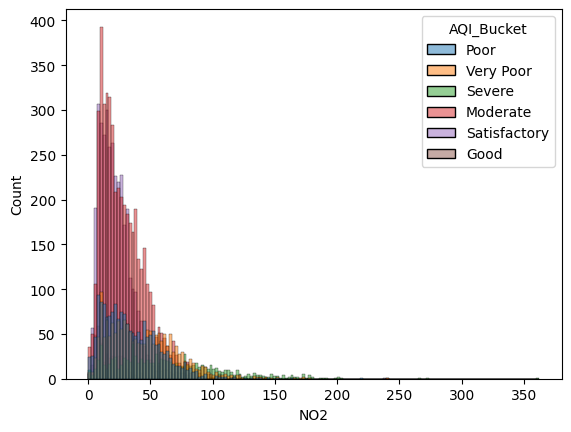

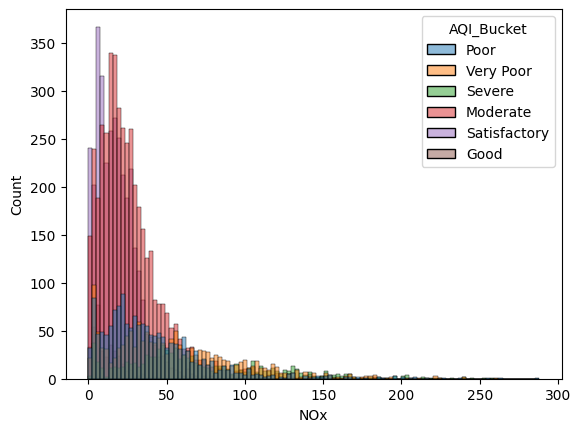

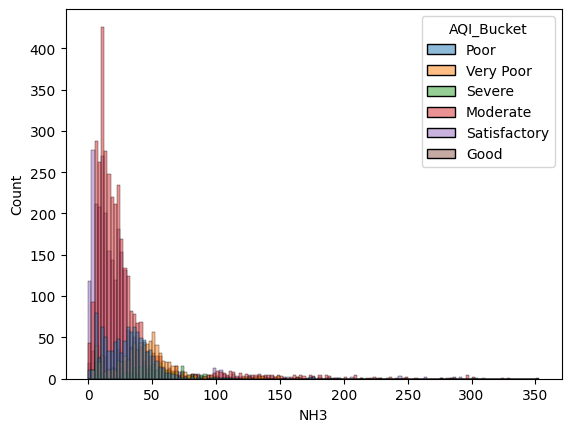

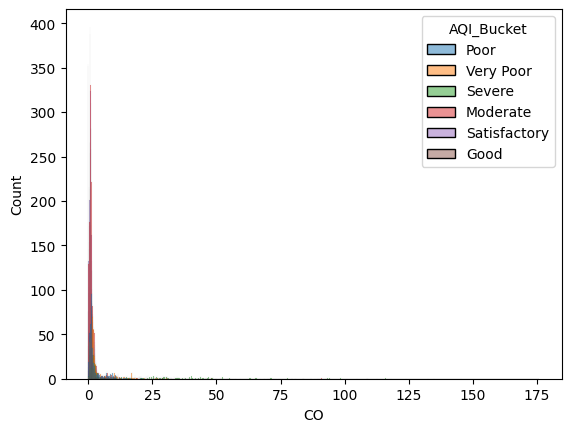

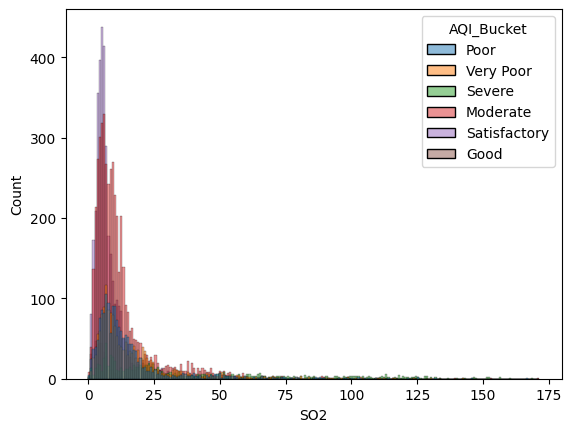

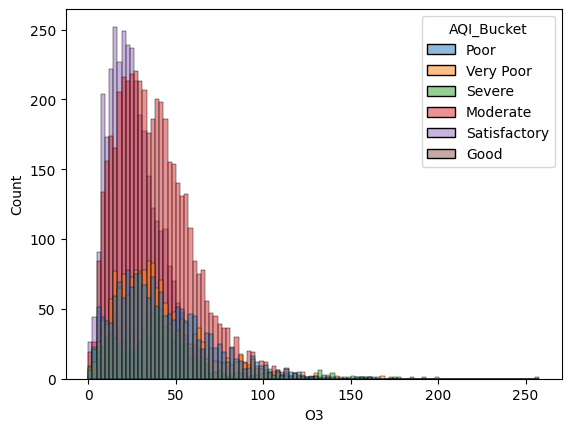

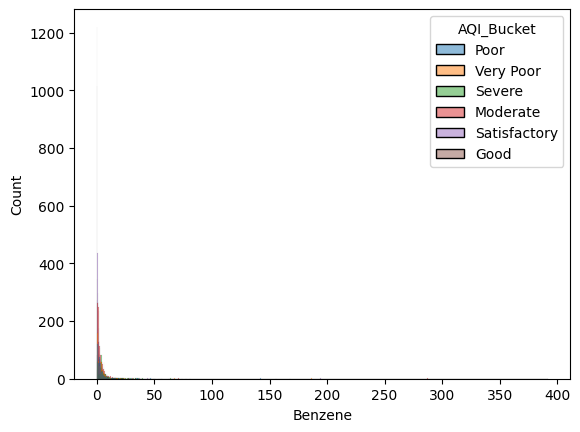

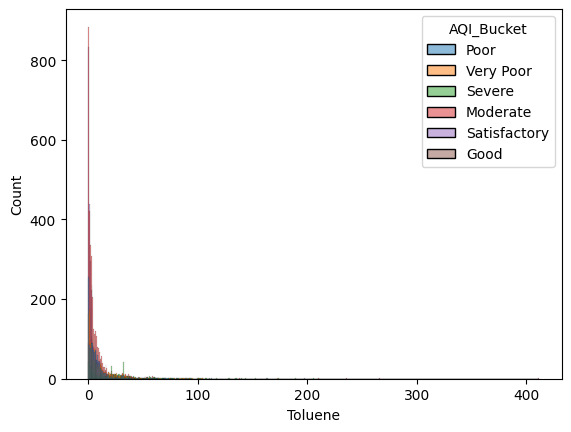

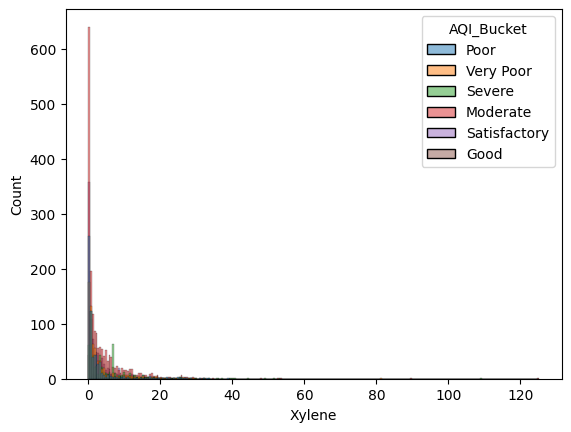

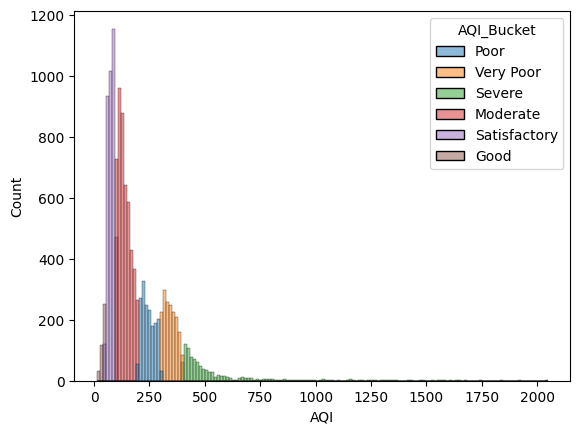

In [70]:
col = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']

for i in col:
    sb.histplot(data=new_df, x=df[i], hue='AQI_Bucket', fill=True)
    plt.show()


b (ii)


City             0
Date             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
Xylene           0
AQI              0
AQI_Bucket    4081
Year             0
dtype: int64


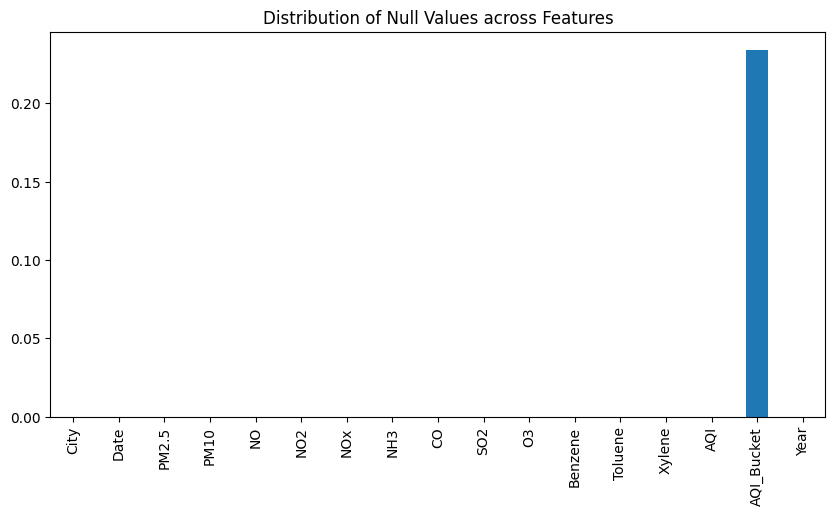

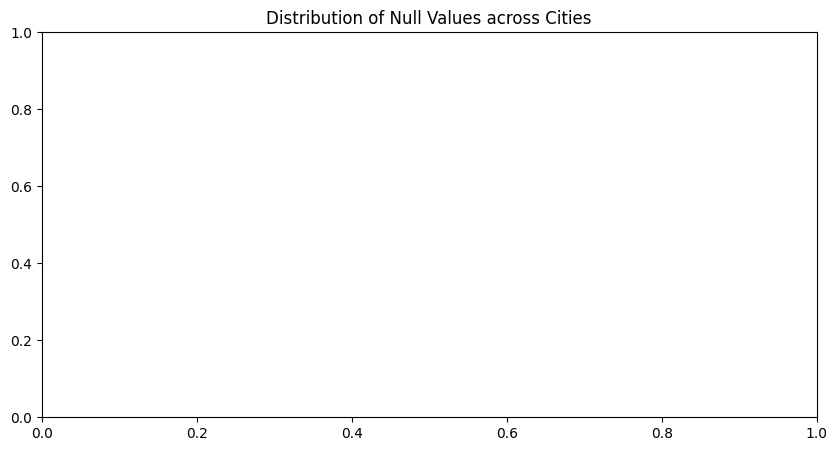

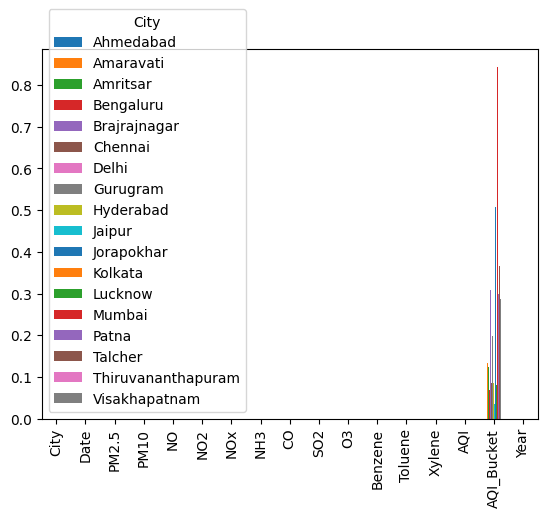

C:\Users\arjun\AppData\Local\Temp\ipykernel_16944\430269800.py:26: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  new_data = merged_data.fillna(df.mean())
C:\Users\arjun\AppData\Local\Temp\ipykernel_16944\430269800.py:26: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_data = merged_data.fillna(df.mean())


In [43]:
print(merged_data.isnull().sum())  # check for null values

# Plotting the distribution of null values across features
plt.figure(figsize=(10, 5))
plt.title("Distribution of Null Values across Features")
merged_data.isnull().mean().plot(kind='bar')
plt.show()

# Plotting the distribution of null values across cities
plt.figure(figsize=(10, 5))
plt.title("Distribution of Null Values across Cities")
merged_data.groupby("City").apply(
    lambda x: x.isnull().mean()).T.plot(kind='bar')
plt.show()

# Mean/Median Imputation: Replacing missing values with the mean or median of the feature
# Mode Imputation: Replacing missing values with the most frequent value in the feature
# KNN Imputation: Replacing missing values with the average of the K nearest neighbors in feature space
# Regression Imputation: Replacing missing values using a regression model
# Here is an example of mean imputation:

new_data = merged_data.fillna(df.mean())

# Pros: Simple and easy to implement.
# Cons: Assumes a normal distribution of the data and can distort the original distribution.


#### Question 3


In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [78]:
df = pd.read_csv('bmd.csv')
df = df.drop(['id'], axis=1)

In [79]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df = df.apply(labelencoder.fit_transform)

In [80]:
print('Dataset has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))


Dataset has 169 rows and 8 columns.


In [81]:
df.isnull().sum()

age             0
sex             0
fracture        0
weight_kg       0
height_cm       0
medication      0
waiting_time    0
bmd             0
dtype: int64

In [82]:
df.head()

age  sex  fracture  weight_kg  height_cm  medication  waiting_time  bmd
0   55    0         1         23         17           0            13  120
1  136    0         1         40         28           2            39   86
2  121    1         1         35         43           2             5  130
3  147    0         1         19          4           2             9   54
4   39    1         1         14         26           2            15   84

In [64]:
data_features = df.drop(['bmd'], axis=1)
data_labels = df['bmd']

X_train, X_test, y_train, y_test = train_test_split(
    data_features, data_labels, test_size=0.2, random_state=42)

In [65]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((135, 7), (34, 7), (135,), (34,))

In [48]:
# Importing the required modules
import numpy as np
from scipy.stats import mode

def eucledian(p1, p2):
    dist = np.sqrt(np.sum((p1-p2)**2))
    return dist


def predict(x_train, y, x_test, k):
    op_labels = []

    for item in x_test:
        point_dist = []
        for j in range(len(x_train)):
            distances = eucledian(np.array(x_train[j, :]), item)
            point_dist.append(distances)
        point_dist = np.array(point_dist)
        dist = np.argsort(point_dist)[:k]

        labels = y[dist]

        lab = mode(labels)
        lab = lab.mode[0]
        op_labels.append(lab)
    return op_labels

def r2_score(y_true, y_pred):
    mean_y = np.mean(y_true)
    ss_tot = sum((y_true - mean_y) ** 2)
    ss_res = sum((y_true - y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

y_pred = predict(X_train, y_train, X_test, 5)
r2score = r2_score(y_test, y_pred)
print("R2 Score: ", r2score)
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))

InvalidIndexError: (0, slice(None, None, None))

In [49]:
import numpy as np
from scipy.spatial.distance import euclidean


class KNNRegressor:
    def __init__(self, k=5):
        self.k = k

    def fit(self, X, y):
        self.X = X
        self.y = y

    def euclidean_distance(self, x1, x2):
        distance = np.sqrt(np.sum((x1 - x2)**2))
        return distance
    
    def eucledian(p1, p2):
        dist = np.sqrt(np.sum((p1-p2)**2))
        return dist


    def predict(self, X_test):
        y_pred = []
        for x_test in X_test:
            distances = [euclidean(np.ravel(x_test), np.ravel(x)) for x in self.X]
            closest_k = np.argsort(distances)[:self.k]
            y_pred.append(np.mean(self.y[closest_k]))
        return np.array(y_pred)

    def r2_score(y_true, y_pred):
        mean_y = np.mean(y_true)
        ss_tot = sum((y_true - mean_y) ** 2)
        ss_res = sum((y_true - y_pred) ** 2)
        r2 = 1 - (ss_res / ss_tot)
        return r2

knn = KNNRegressor(k=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U3'), dtype('<U3')) -> None

In [83]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# boston = datasets.load_boston()
# X = boston.data
# y = boston.targetAC

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

def predict(X, y, X_new, k=5):
    n_samples = X.shape[0]
    n_features = X.shape[1]
    n_samples_new = X_new.shape[0]
    predictions = np.zeros((n_samples_new,))
    for i in range(n_samples_new):
        x_new = X_new[i]
        distances = np.zeros((n_samples,))
        for j in range(n_samples):
            x = X[j]
            distances[j] = np.linalg.norm(x_new - x)
        k_neighbors = np.argsort(distances)[:k]
        predictions[i] = np.mean(y[k_neighbors])
    return predictions

def r2_score(y_true, y_pred):
    mean_y_true = np.mean(y_true)
    ss_tot = np.sum((y_true - mean_y_true)**2)
    ss_res = np.sum((y_true - y_pred)**2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

y_pred = predict(X_train, y_train, X_test, k=5)
mse = mean_squared_error(y_test, y_pred)
print(r2_score(y_test, y_pred))
print("Mean Squared Error: {:.2f}".format(mse))

KeyError: 0

#### Question 4


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [11]:
iris_df = pd.read_csv('iris.csv')
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
iris_df = iris_df.apply(labelencoder.fit_transform)

X = iris_df.iloc[:, :-1]
y = iris_df.iloc[:, -1]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Performing EDA on Iris Dataset

In [32]:
print(f'The dataset has {iris_df.shape[0]} rows and {iris_df.shape[1]} columns.')
print(iris_df.info())
print(iris_df.nunique())

The dataset has 150 rows and 5 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Sepal Length   150 non-null    int64
 1    Sepal Width   150 non-null    int64
 2    Petal Length  150 non-null    int64
 3    Petal Width   150 non-null    int64
 4    Species       150 non-null    int32
dtypes: int32(1), int64(4)
memory usage: 5.4 KB
None
Sepal Length     35
 Sepal Width     23
 Petal Length    43
 Petal Width     22
 Species          3
dtype: int64


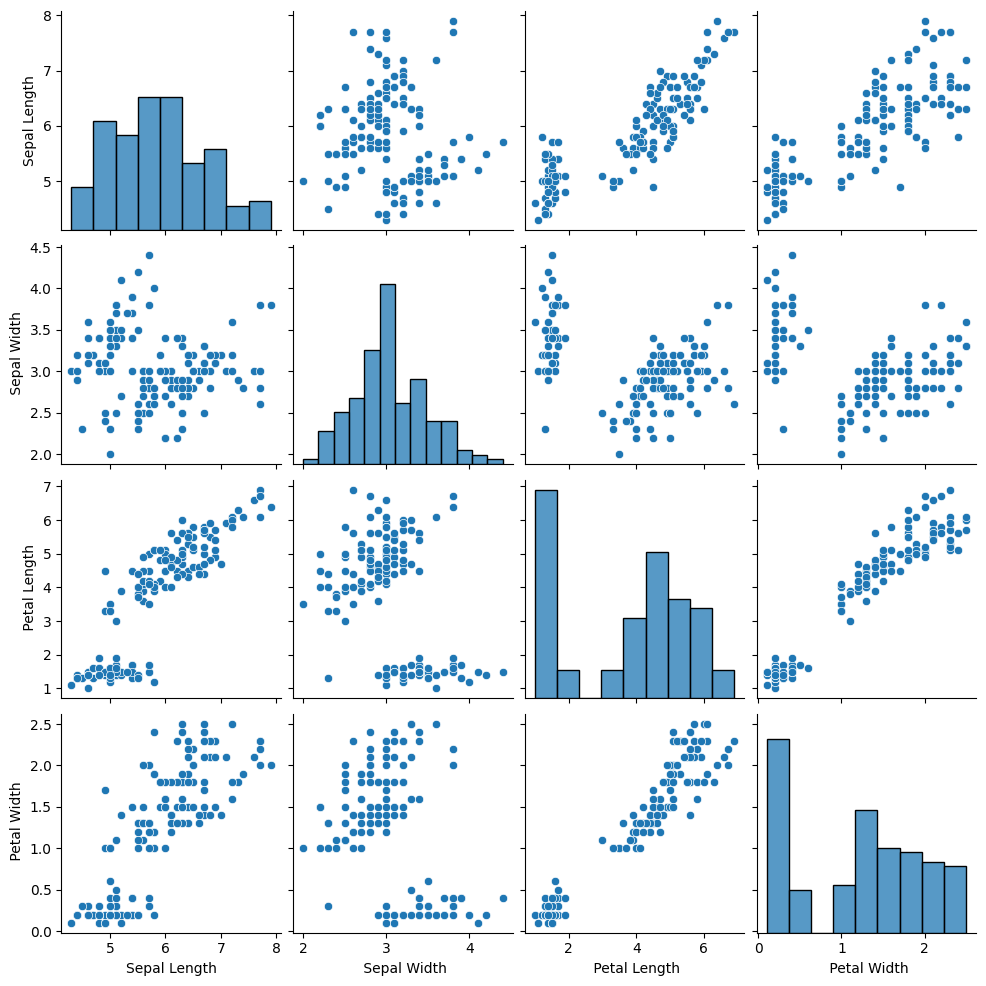

In [14]:
import seaborn as sb
sb.pairplot(iris_df)

<AxesSubplot:>

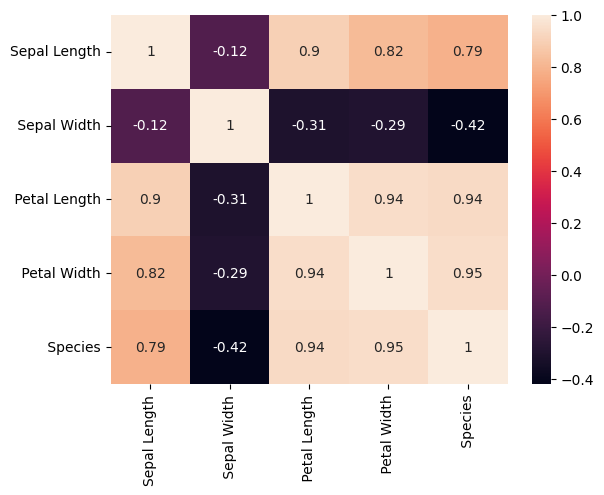

In [33]:
core = iris_df.corr()
sb.heatmap(core, xticklabels=core.columns,
           yticklabels=core.columns, annot=True)  # correlation Plot

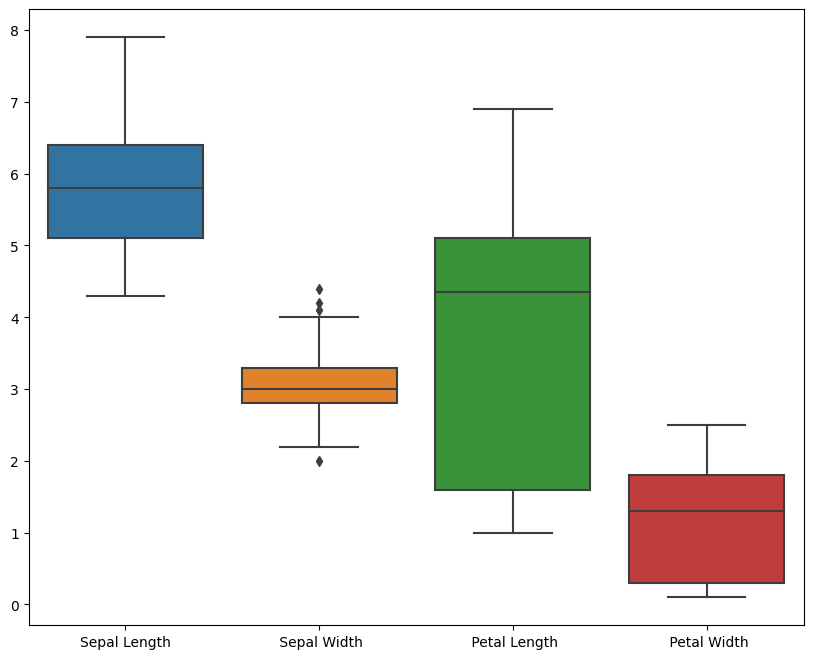

In [16]:
plt.figure(figsize=(10, 8))
sb.boxplot(data=iris_df, width=0.8)
plt.show()

(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

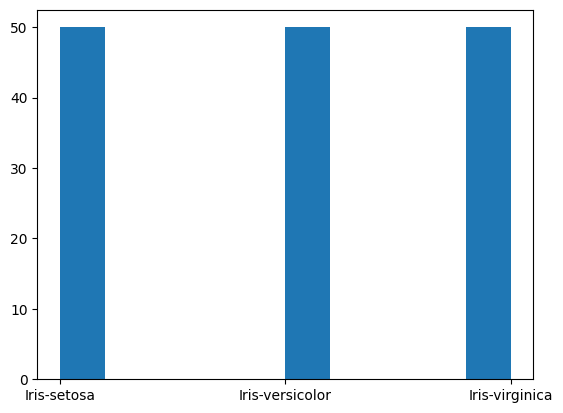

In [17]:
plt.hist(y, bins=10)

In [18]:
print('Training set size: ', X_train.shape)
print('Testing set size: ', X_test.shape)

Training set size:  (120, 4)
Testing set size:  (30, 4)


In [21]:
def GaussianNB(X_train, y_train, X_test, Y_test):
    means = []
    variances = []
    for i in range(3):
        X_class = X_train[y_train == i]
        mean = np.mean(X_class, axis=0)
        variance = np.var(X_class, axis=0)
        means.append(mean)
        variances.append(variance)

    priors = []
    for i in range(3):
        prior = np.mean(y_train == i)
        priors.append(prior)

    likelihoods = []
    for i in range(3):
        likelihood = []
        for j in range(4):
            likelihood.append(np.exp(-(X_test[:, j] - means[i][j])**2 / (2 * variances[i][j])) / np.sqrt(2 * np.pi * variances[i][j]))
        likelihoods.append(likelihood)

    posteriors = []
    for i in range(len(X_test)):
        posterior = []
        for j in range(3):
            p = priors[j]
            for k in range(4):
                p *= likelihoods[j][k][i]
            posterior.append(p)
        posteriors.append(posterior)

    y_pred = np.argmax(posteriors, axis=1)
    return y_pred

df = pd.read_csv('_iris_.csv')
df = df.apply(LabelEncoder().fit_transform)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_pred = GaussianNB(X_train, y_train, X_test, y_test)

accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8666666666666667


In [20]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
y_pred = GaussianNB().fit(X_train, y_train).predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.8666666666666667
